# Week 10 Instructor-led lab: Advanced Statistical Techniques in Python

Author: Haiheng Xu  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025  
Date: May 3, 2025 

## Notebook Setup

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

In [4]:
# Import file
os.chdir("C:\\Users\\haihe\\Desktop\\Classes\\Intro to Python\\week10labs\\data")
h_df = pd.read_csv('calihospital.txt', sep='\t')

### Principal Component Analysis (PCA) in Python

In [6]:
# Select the 7 variables for PCA 
h_df_pca = h_df[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 
                             'AvlBeds']]

#### Eigenvalues

In [8]:
# Scale data 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(h_df_pca)

# Run PCA
pca_result = pca(n_components=7).fit(scaled_data)
eigenvalues = pca_result.explained_variance_
print(eigenvalues)

[5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91421134e-22]


Acoording to the results, there are only 2 variables have a eigenvalue greater than 1, so only 2 or the variables are influrencial.

#### Scree plot

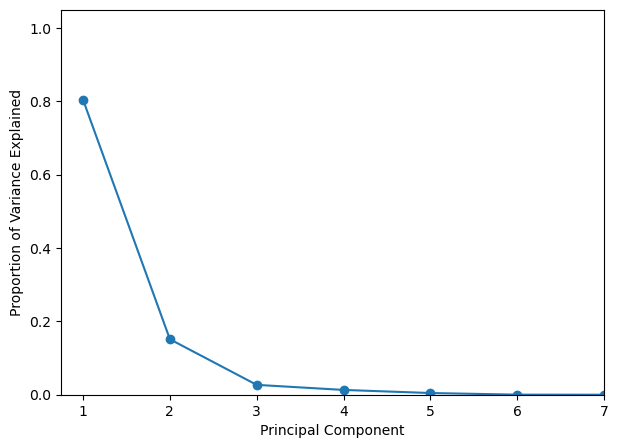

In [11]:
# Run the PCA 
pca_result = pca(n_components=7).fit(scaled_data)

# Generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

Based on the scree plot, it agree with the results from the eigenvalues, we should only keep 2 variables. Because only the first 2 components are not flat, but starting with the third, it become level and flat.

### Clustering in Python

In [19]:
# Select the numerical columns
k_df = h_df[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 
                             'AvlBeds']]
# Scale data 
scaler = preprocessing.StandardScaler()
kscaled_data = scaler.fit_transform(k_df)

# Use 4 clusters
km_4 = cls.KMeans(n_clusters=4, random_state=7).fit(kscaled_data)

# Assigned clusters
km_4.labels_

C:\Users\haihe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\haihe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\haihe\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haihe\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\haihe\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 3, 0, 3, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1])

In [21]:
# Use 2 clusters
km_2 = cls.KMeans(n_clusters=2, random_state=7).fit(kscaled_data)

# Assigned clusters
km_2.labels_

C:\Users\haihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [23]:
# Use 6 clusters
km_6 = cls.KMeans(n_clusters=6, random_state=7).fit(kscaled_data)

# Assigned clusters
km_6.labels_

C:\Users\haihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 5, 5, 3, 2, 3, 3, 1, 4, 1, 3, 3, 1, 4, 1])

By comparing the results of using 2, 4 and 6 clusters, the result from using 2 clusters are showing the best consistency. I think it is fair to justify my choice of k would be 2.

#### Confusion Matrix

In [64]:
# Convert Teaching to categorical
h_df['Teaching'] = h_df['Teaching'].astype('category')

y_true = h_df['Teaching'].cat.codes
y_pred = km_2.labels_
cm1 = metcs.confusion_matrix(y_true, y_pred)
cm1



array([[44,  0],
       [ 8,  9]], dtype=int64)

In [66]:
# Convert TypeControl to categorical
h_df['TypeControl'] = h_df['TypeControl'].astype('category')

y_true = h_df['TypeControl'].cat.codes
y_pred = km_2.labels_
cm2 = metcs.confusion_matrix(y_true, y_pred)
cm2



array([[ 5,  2,  0,  0],
       [14,  0,  0,  0],
       [ 3,  0,  0,  0],
       [30,  7,  0,  0]], dtype=int64)

In [71]:
# Convert DonorType to categorical
h_df['DonorType'] = h_df['DonorType'].astype('category')

y_true = h_df['DonorType'].cat.codes
y_pred = km_2.labels_
cm3 = metcs.confusion_matrix(y_true, y_pred)
cm3



array([[ 8,  9],
       [44,  0]], dtype=int64)

Teaching and DonorType have very good clustering but Teaching has more true positive so Teaching is the best fitting

### References

1. ChatGPT link: https://chatgpt.com/c/681797df-82a4-800c-96b8-2c37bfc613ce(Screenshot in repo)